In [94]:
import pandas as pd
import re

In [3]:
##pegando os dados zipados

data = pd.read_csv('archive.zip', compression='zip', encoding='latin1')

In [4]:
##dataframe

data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
## padronizando o nome das colunas para lower string

data = data.rename(columns=str.lower)

In [6]:
##visualizando os tipos das colunas

data.dtypes

case number                object
date                       object
year                      float64
type                       object
country                    object
area                       object
location                   object
activity                   object
name                       object
sex                        object
age                        object
injury                     object
fatal (y/n)                object
time                       object
species                    object
investigator or source     object
pdf                        object
href formula               object
href                       object
case number.1              object
case number.2              object
original order            float64
unnamed: 22                object
unnamed: 23                object
dtype: object

In [7]:
##número de linhas e colunas

data.columns
print(data.shape)
print (data.size)

(25723, 24)
617352


In [8]:
##número de objetos não-nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal (y/n)             5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null 

In [9]:
##Número de objetos nulos

data.isnull().sum()

case number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex                       19986
age                       22252
injury                    19449
fatal (y/n)               19960
time                      22775
species                   22259
investigator or source    19438
pdf                       19421
href formula              19422
href                      19421
case number.1             19421
case number.2             19421
original order            19414
unnamed: 22               25722
unnamed: 23               25721
dtype: int64

In [10]:
##visualização das colunas

data.columns

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex ', 'age', 'injury', 'fatal (y/n)', 'time',
       'species ', 'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order', 'unnamed: 22',
       'unnamed: 23'],
      dtype='object')

In [11]:
##renomeando as colunas, pois as colunas sex e species estavam com espaçamento no final

data = data.rename(columns={'species ': 'species',
                        'sex ': 'sex'}
           )
data.columns

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal (y/n)', 'time',
       'species', 'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order', 'unnamed: 22',
       'unnamed: 23'],
      dtype='object')

In [12]:
data

,case number,date,year,type,country,area,location,activity,name,sex,...,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
## Transformando a coluna Year em INT ao invés de FLOAT64
data["year"] = data["year"].fillna(0.0).astype(int)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    25723 non-null  int32  
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal (y/n)             5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null 

In [71]:
#Apagando colunas menos importantes que não utilizarei
data_clean = data.drop(columns=['unnamed: 22','unnamed: 23', 'original order', 'case number.1','case number.2','name','investigator or source', 'pdf', 'href formula', 'href'],axis=1)

In [72]:
data_clean.columns

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'sex', 'age', 'injury', 'fatal (y/n)', 'time', 'species'],
      dtype='object')

In [73]:
data_clean

,case number,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),time,species
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
##número de linhas e colunas

data_clean.columns
print(data.shape)
print (data.size)

(25723, 24)
617352


In [19]:
##ataques são mais comuns quando não são provocados (CONTAGEM)

data_clean.type.value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: type, dtype: int64

In [20]:
##dados mais consistentes nos USA e Australia (CONTAGEM)

data_clean.country.value_counts()

USA                       2229
AUSTRALIA                 1338
SOUTH AFRICA               579
PAPUA NEW GUINEA           134
NEW ZEALAND                128
                          ... 
MALDIVE ISLANDS              1
NICARAGUA                    1
NORTH SEA                    1
RED SEA / INDIAN OCEAN       1
CEYLON (SRI LANKA)           1
Name: country, Length: 212, dtype: int64

In [21]:
 ##Area com mais ataques (CONTAGEM)

data_clean.area.value_counts()

Florida                                 1037
New South Wales                          486
Queensland                               311
Hawaii                                   298
California                               290
                                        ... 
Ysabel Island                              1
 Lau Province                              1
South Coast, East New Britain              1
Between Southampton & Canary Islands       1
Moala Island                               1
Name: area, Length: 825, dtype: int64

In [23]:
##Ataques atingem a população mais jovem (CONTAGEM)


data_clean.age.value_counts()

17                154
18                150
19                142
20                141
15                139
                 ... 
20?                 1
 28                 1
7      &    31      1
 30                 1
13 or 14            1
Name: age, Length: 157, dtype: int64

In [24]:
##Atividades mais perigosas para ser atacado (CONTAGEM)

data_clean.activity.value_counts()

Surfing                                   971
Swimming                                  869
Fishing                                   431
Spearfishing                              333
Bathing                                   162
                                         ... 
Playing with a frisbee in the shallows      1
Sinking of the ferryboat Dumaguete          1
Wreck of the Storm King                     1
Feeding mullet to sharks                    1
Wreck of  large double sailing canoe        1
Name: activity, Length: 1532, dtype: int64

In [25]:
## Máscara para pegar somente os valores nulos da coluna activity guardando numa variável e indexando no dataframe
mask_na_activity = data_clean['activity'].isna()
tb_activity_na = data_clean[mask_na_activity]

In [148]:
tb_activity_na.shape

(19965, 14)

In [27]:
tb_activity_na.head()

,case number,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),time,species
47,2018.01.28,28-Jan-2018,2018,Unprovoked,AUSTRALIA,Western Australia,Cone Bay,NaN,M,18,Injuries to right leg,N,08h00,Bull shark
108,2017.07.29.a,29-Jul-2017,2017,Unprovoked,USA,South Carolina,"DeBordieu Colony, Georgetown County",NaN,F,12,Bite to left thigh / minor injury,N,Afternoon,NaN
112,2017.07.23.b,23-Jul-2017,2017,Unprovoked,USA,New Jersey,Ventnor,NaN,F,NaN,Minor injury to hand,N,NaN,Sandtiger shark 2'
114,2017.07.22,22-Jul-2017,2017,Unprovoked,USA,Florida,"Snipes Point, Monroe County",NaN,F,40,Foot bitten,N,12h30,"""A small shark"""
154,2017.04.17.b,17-Apr-2017,2017,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",NaN,NaN,NaN,Minor bite to the foot,N,Afternoon,NaN


In [28]:
sum(tb_activity_na['activity'].isna()) ##Para a coluna activity 19965 linhas estão com os dados como NaN

19965

In [ ]:
## Qual é a atividade mais arriscada?

In [41]:
data_clean.activity.value_counts()

Surfing                                   971
Swimming                                  869
Fishing                                   431
Spearfishing                              333
Bathing                                   162
                                         ... 
Playing with a frisbee in the shallows      1
Sinking of the ferryboat Dumaguete          1
Wreck of the Storm King                     1
Feeding mullet to sharks                    1
Wreck of  large double sailing canoe        1
Name: activity, Length: 1532, dtype: int64

In [29]:
data_1 = data_clean['activity'].value_counts().to_frame()

In [30]:
data_1

,activity
Surfing,971
Swimming,869
Fishing,431
Spearfishing,333
Bathing,162
...,...
Playing with a frisbee in the shallows,1
Sinking of the ferryboat Dumaguete,1
Wreck of the Storm King,1
Feeding mullet to sharks,1


In [31]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1532 entries, Surfing to Wreck of  large double sailing canoe
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   activity  1532 non-null   int64
dtypes: int64(1)
memory usage: 23.9+ KB


In [32]:
## Lista das atividades que geraram ataques 

for lista in data_1.index:
    print(lista)


Surfing
Swimming
Fishing
Spearfishing
Bathing
Wading
Diving
Standing
Snorkeling
Scuba diving
Body boarding
Body surfing
Swimming 
Kayaking
Treading water
Pearl diving
Fell overboard
Free diving
Boogie boarding
Windsurfing
Walking
Boogie Boarding
Shark fishing
Floating
Fishing 
Canoeing
Surf skiing
Surf fishing
Surf-skiing
Rowing
Fishing for sharks
Kayak Fishing
Scuba Diving
Freediving
Sponge diving
Fell into the water
Sailing
Sitting on surfboard
Diving for trochus
Paddle boarding
Sea disaster
Diving for abalone
Free diving for abalone
Skindiving
Playing
Surf skiing 
Surfing (sitting on his board)
Boating
Floating on his back
Spearfishing 
Spearfishing on Scuba
Sea Disaster
Fishing for mackerel
Murder
Stand-Up Paddleboarding
Kite Surfing
Shipwreck
Dangling feet in the water
Boat
Fishing on a boat
Paddleskiing
Surfing 
Kayaking / Fishing
Hard hat diving
Freedom swimming
Kite surfing
Scuba diving (submerged)
Fishing boat
Seine netting
Clamming
Skin diving
Feeding sharks
Jumped into the w

In [149]:
data

,case number,date,year,type,country,area,location,activity,name,sex,...,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
data_clean.isnull().sum()

case number       17021
date              19421
year                  0
type              19425
country           19471
area              19876
location          19961
activity          19965
sex               19986
age               22252
injury            19449
fatal (y/n)       19960
time              22775
species           22259
activity_clean        0
dtype: int64

In [205]:
data_clean.shape

(25723, 15)

In [206]:
data_clean

,case number,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),time,species,activity_clean
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,Paddling
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,Standing
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,Surfing
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,Surfing
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",Free diving
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others activities
25719,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others activities
25720,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others activities
25721,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others activities


In [207]:
## Limpando linhas que tenham mais do que 5 NAs (50%)

data_clean_2 = data_clean.dropna(thresh=(data_clean.shape[1] - 5))

In [253]:
data_clean_2

,case number,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),time,species,activity_clean
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,Paddling
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,Standing
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,Surfing
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,Surfing
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",Free diving
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,NaN,FATAL,Y,NaN,NaN,Diving
6298,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,FATAL,Y,NaN,NaN,Pearl diving
6299,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,FATAL,Y,NaN,NaN,Swimming
6300,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",Unknown,M,NaN,FATAL,Y,NaN,NaN,others activities


In [281]:
mask_surfing = data_clean_2['activity'].map(lambda x: str(x).lower().find('surfing') >= 0)
mask_swimming = data_clean_2['activity'].map(lambda x: str(x).lower().find('swimming') >= 0)
mask_fishing = data_clean_2['activity'].map(lambda x: str(x).lower().find('fishing') >= 0)
mask_spearfishing = data_clean_2['activity'].map(lambda x: str(x).lower().find('spearfishing') >= 0)
mask_unknown = data_clean_2['activity'].map(lambda x: str(x).lower().find('unknown') >= 0)

In [311]:
data_clean_2['activity_clean'] = 'others activities' ##truque para nomear todas as linhas como others e depois substituir abaixo pelas máscaras criadas

data_clean_2.loc[mask_surfing, 'activity_clean'] = 'surfing'
data_clean_2.loc[mask_swimming, 'activity_clean'] = 'swimming'
data_clean_2.loc[mask_fishing, 'activity_clean'] = 'fishing'
data_clean_2.loc[mask_spearfishing, 'activity_clean'] = 'spearfishing'
data_clean_2.loc[mask_unknown, 'activity_clean'] = 'unknown'


C:\Users\diego\AppData\Local\Temp/ipykernel_81136/3622507245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_2['activity_clean'] = 'others activities'
C:\Users\diego\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [285]:
##data_clean_2['activity_clean'] = data_clean_2['activity_clean'].fillna('others activities')

C:\Users\diego\AppData\Local\Temp/ipykernel_81136/3175273979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_2['activity_clean'] = data_clean_2['activity_clean'].fillna('others activities')


In [286]:
data_clean_2

,case number,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),time,species,activity_clean
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,Paddling
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,Standing
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,surfing
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,surfing
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",Free diving
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,NaN,FATAL,Y,NaN,NaN,Diving
6298,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,FATAL,Y,NaN,NaN,Pearl diving
6299,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,FATAL,Y,NaN,NaN,swimming
6300,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",Unknown,M,NaN,FATAL,Y,NaN,NaN,unknown


In [313]:
data_clean_2['activity_clean'].value_counts()

others activities    2335
surfing              1120
swimming             1104
fishing               738
unknown               492
spearfishing          431
Name: activity_clean, dtype: int64

In [314]:
##Substituindo os NAs para desconhecido nas colunas que serão utilizadas

data_clean_2['activity'] = data_clean_2['activity'].fillna('Unknown')

C:\Users\diego\AppData\Local\Temp/ipykernel_81136/2617480061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_2['activity'] = data_clean_2['activity'].fillna('Unknown')


In [210]:
data_clean_2['fatal (y/n)'].value_counts()

N          4262
Y          1365
UNKNOWN      62
 N            7
M             1
2017          1
N             1
y             1
Name: fatal (y/n), dtype: int64

In [211]:
data_clean_2['sex'].value_counts()

M      5052
F       636
M         2
N         2
lli       1
.         1
Name: sex, dtype: int64

In [212]:
data_clean_2['type'].value_counts()

Unprovoked      4553
Provoked         570
Invalid          531
Sea Disaster     228
Boating          199
Boat             133
Questionable       2
Boatomg            1
Name: type, dtype: int64

Text(0, 0.5, 'Tipo de Ataque')

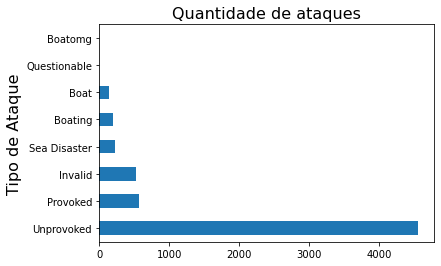

In [213]:
data_clean_2['type'].value_counts().plot(kind = 'barh')
plt.title('Quantidade de ataques', size = 16)
plt.ylabel('Tipo de Ataque', size = 16)

In [214]:
data_clean_2['sex'].value_counts()

M      5052
F       636
M         2
N         2
lli       1
.         1
Name: sex, dtype: int64

In [215]:
data_clean_2[data_clean_2['sex'] == 'M ']

,case number,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),time,species,activity_clean
563,2014.04.22,22-Apr-2014,2014,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Swimming,M,42,Laceration & puncture wounds to right foot,N,15h30,NaN,Swimming
1587,2005.05.15,15-May-2005,2005,Unprovoked,AUSTRALIA,Queensland,50 km east of Townsville,Spearfishing,M,NaN,Severe injury to lower leg,N,NaN,Blacktip shark,Spearfishing


In [216]:
data_clean_2[data_clean_2['sex'] == 'N']

,case number,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),time,species,activity_clean
4938,1934.07.11,11-Jul-1934,1934,Boating,AUSTRALIA,New South Wales,Cronulla,Fishing,N,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'",Fishing
6131,1801.12.18.R,Reported 18-Dec-1801,1801,Provoked,NaN,NaN,NaN,Standing on landed shark's tail,N,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,12' shark,Standing on landed shark's tail


In [217]:
data_clean_2[data_clean_2['sex'] == 'lli']

,case number,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),time,species,activity_clean
1624,2004.11.11.b,11-Nov-2004,2004,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,lli,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark,Surfing


In [218]:
data_clean_2[data_clean_2['sex'] == '.']

,case number,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),time,species,activity_clean
5437,1908.06.02.R,Reported 02-Jun-1908,1908,Sea Disaster,PAPUA NEW GUINEA,New Britain,Matupi,.,.,NaN,"Remains of 3 humans recovered from shark, but ...",Y,NaN,Allegedly a 33-foot shark,.


In [219]:
mask_1 = data_clean_2.index == 563

In [220]:
data_clean_2.loc[mask_1, 'sex'] = 'M'

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [221]:
mask_2 = data_clean_2.index == 1587

In [222]:
data_clean_2.loc[mask_2, 'sex'] = 'M'

In [223]:
mask_3 = data_clean_2.index == 4938

In [224]:
data_clean_2.loc[mask_3, 'sex'] = 'UNKNOWN'

In [225]:
mask_4 = data_clean_2.index == 6131

In [226]:
data_clean_2.loc[mask_4, 'sex'] = 'UNKNOWN'

In [227]:
mask_5 = data_clean_2.index == 1624

In [228]:
data_clean_2.loc[mask_5, 'sex'] = 'UNKNOWN'

In [229]:
mask_6 = data_clean_2.index == 5437

In [230]:
data_clean_2.loc[mask_6, 'sex'] = 'UNKNOWN'

In [231]:
data_clean_2['sex'].value_counts()

M          5054
F           636
UNKNOWN       4
Name: sex, dtype: int64

Text(0, 0.5, 'Sexo')

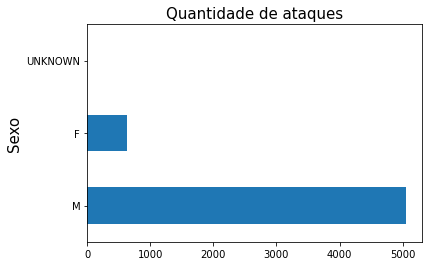

In [315]:
data_clean_2['sex'].value_counts().plot(kind = 'barh')
plt.title('Quantidade de ataques', size = 15)
plt.ylabel('Sexo', size = 15)

In [251]:
data_clean_2['activity_clean'].value_counts().sum()

6220

In [252]:
data_clean_2

,case number,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),time,species,activity_clean
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,Paddling
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,Standing
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,Surfing
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,Surfing
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",Free diving
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,NaN,FATAL,Y,NaN,NaN,Diving
6298,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,FATAL,Y,NaN,NaN,Pearl diving
6299,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,FATAL,Y,NaN,NaN,Swimming
6300,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",Unknown,M,NaN,FATAL,Y,NaN,NaN,others activities


In [272]:
data_clean_2['activity_clean'].value_counts()

Surfing                                                             971
Swimming                                                            867
Unknown                                                             490
Fishing                                                             430
Spearfishing                                                        332
                                                                   ... 
Fishing (big game)                                                    1
Overturned skiff                                                      1
The passenger ship Pioneer Cebu  capsized & sank in Typhoon Irma      1
Sinking of the dredge World Atlas                                     1
Wreck of  large double sailing canoe                                  1
Name: activity_clean, Length: 1521, dtype: int64

In [319]:
surfing = data_clean_2[data_clean_2['activity_clean']=='surfing']

In [320]:
unknown = data_clean_2[data_clean_2['activity_clean']=='unknown']

In [321]:
fishing = data_clean_2[data_clean_2['activity_clean']=='fishing']

In [322]:
swimming = data_clean_2[data_clean_2['activity_clean']=='swimming']

In [323]:
spearfishing = data_clean_2[data_clean_2['activity_clean']=='spearfishing']

In [324]:
others = data_clean_2[data_clean_2['activity_clean']=='others activities']

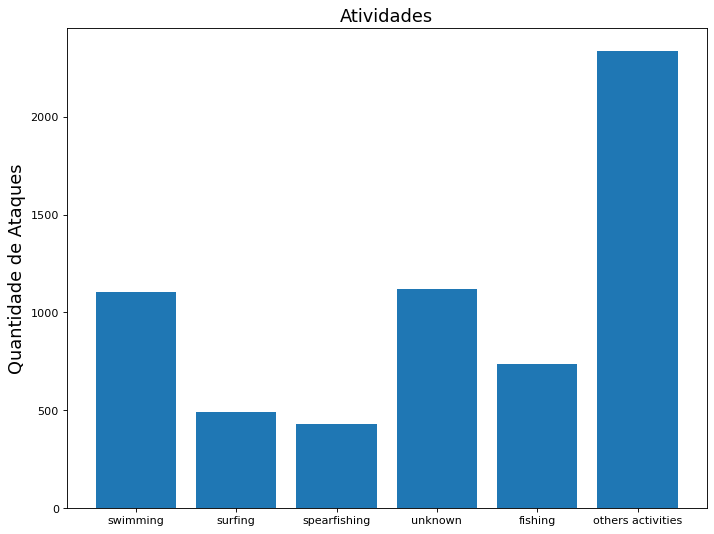

In [325]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig = figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])
Activities = ['swimming', 'surfing', 'spearfishing', 'unknown', 'fishing', 'others activities']
Attacks = [len(swimming),len(unknown),len(spearfishing),len(surfing),len(fishing), len(others)]
ax.bar(Activities,Attacks)
plt.title('Atividades', size = 16)
plt.ylabel('Quantidade de Ataques', size = 16)
plt.show()


In [63]:
data_clean_2['fatal (y/n)'].value_counts().sum()

5700

In [84]:
data_clean_2['fatal (y/n)'].value_counts()

N          4263
Y          1365
UNKNOWN      62
 N            7
M             1
2017          1
y             1
Name: fatal (y/n), dtype: int64

In [359]:
data_clean_2[data_clean_2['fatal (y/n)'] == 'N ']

,case number,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),time,species,activity_clean
5427,1909.00.00,1909,1909,Unprovoked,AUSTRALIA,New South Wales,Woy Woy,Unknown,NaN,NaN,Survived,N,NaN,NaN,unknown


In [360]:
mascara_1 = data_clean_2.index == 5427

In [361]:
data_clean_2.loc[mascara_1, 'fatal (y/n)'] = 'N'

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [362]:
data_clean_2['fatal (y/n)'].value_counts()

N          4270
Y          1366
UNKNOWN      64
Name: fatal (y/n), dtype: int64

In [330]:
data_clean_2[data_clean_2['fatal (y/n)'] == ' N']


,case number,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),time,species,activity_clean
3942,1960.12.27.a.,27-Dec-1960,1960,Unprovoked,AUSTRALIA,New South Wales,"Bondi Beach, Sydney",Unknown,F,27,"Shark brushed past, minor injuries if any",N,NaN,3 m [10'] shark,unknown
3944,1960.12.20,20-Dec-1960,1960,Unprovoked,AUSTRALIA,Queensland,"Colleges Crossing, 54 miles above mouth of th...","Fishing, when line became snagged on rock & he...",M,33,Left thigh lacerated,N,09h00,"Grey nurse shark, 1m",fishing
3946,1960.11.27,27-Nov-1960,1960,Unprovoked,AUSTRALIA,Queensland,"Blacks Beach, 9 miles north of Mackay",Swimming,M,41,Right shoulder lacerated,N,14h45,3' shark,swimming
3948,1960.11.11,11-Nov-1960,1960,Provoked,AUSTRALIA,Queensland,"Scotts Point, Redcliffe Peninsula",Chasing shark out of bathing area while riding...,M,17,"Shark knocked him off surf-ski, he inhaled wat...",N,15h00,NaN,others activities
3949,1960.11.06,06-Nov-1960,1960,Unprovoked,AUSTRALIA,Western Australia,Hamelin Bay,"Spearfishing, speared fish retreated to cave w...",M,24,Scratches on right upper arm,N,NaN,"Wobbegong shark, 1.8 m [6']",spearfishing
3951,1960.11.00.c,Nov-1960,1960,Provoked,NEW GUINEA,Western District,Toro Passage,Unknown,M,NaN,Left wrist bitten by netted shark placed in bo...,N,NaN,"1.4 m [4'6""] blacktip shark",unknown
3956,1960.10.00.e,Oct-1960,1960,Unprovoked,PAPUA NEW GUINEA,New Britain,"East Nakanai, Talasea",Collecting shells,M,26,Injuries to leg & foot,N,NaN,NaN,others activities


In [331]:
mascara_2 = data_clean_2.index == 3942

In [332]:
data_clean_2.loc[mascara_2, 'fatal (y/n)'] = 'N'

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [333]:
mascara_3 = data_clean_2.index == 3946

In [335]:
data_clean_2.loc[mascara_3, 'fatal (y/n)'] = 'N'

In [336]:
mascara_4 = data_clean_2.index == 3944

In [337]:
data_clean_2.loc[mascara_4, 'fatal (y/n)'] = 'N'

In [338]:
mascara_5 = data_clean_2.index == 3949

In [339]:
data_clean_2.loc[mascara_5, 'fatal (y/n)'] = 'N'

In [340]:
mascara_6 = data_clean_2.index == 3948

In [341]:
data_clean_2.loc[mascara_6, 'fatal (y/n)'] = 'N'

In [342]:
mascara_7 = data_clean_2.index == 3951

In [343]:
data_clean_2.loc[mascara_7, 'fatal (y/n)'] = 'N'

In [344]:
mascara_8 = data_clean_2.index == 3956

In [345]:
data_clean_2.loc[mascara_8, 'fatal (y/n)'] = 'N'

In [348]:
data_clean_2[data_clean_2['fatal (y/n)'] == '2017']


,case number,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),time,species,activity_clean
786,2012.06.10,10-Jun-2012,2012,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,M,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,"Blue shark, 2.5m",others activities


In [349]:
mascara_9 = data_clean_2.index == 786

In [350]:
data_clean_2.loc[mascara_9, 'fatal (y/n)'] = 'UNKNOWN'

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [351]:
data_clean_2[data_clean_2['fatal (y/n)'] == 'M']


,case number,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),time,species,activity_clean
285,2016.04.18.b,18-Apr-2016,2016,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,M,22,Laceration to knee by speared shark PROVOKED I...,M,Morning,"Grey reef shark, 2 m",spearfishing


In [352]:
mascara_10 = data_clean_2.index == 285

In [353]:
data_clean_2.loc[mascara_10, 'fatal (y/n)'] = 'UNKNOWN'

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [355]:
data_clean_2[data_clean_2['fatal (y/n)'] == 'y']


,case number,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),time,species,activity_clean
6117,1815.10.00,October 1815,1815,Unprovoked,TOBAGO,NaN,Scarborough Bay,Bathing,M,NaN,FATAL,y,NaN,NaN,others activities


In [356]:
mascara_11 = data_clean_2.index == 6117

In [357]:
data_clean_2.loc[mascara_11, 'fatal (y/n)'] = 'Y'

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [358]:
data_clean_2['fatal (y/n)'].value_counts()

N          4269
Y          1366
UNKNOWN      64
N             1
Name: fatal (y/n), dtype: int64

In [131]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sofreu ataque fatal')

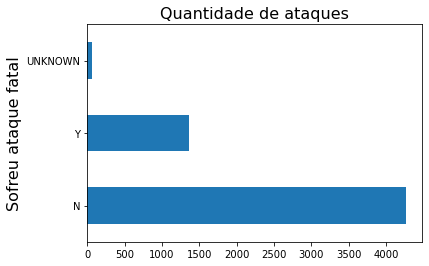

In [363]:
data_clean_2['fatal (y/n)'].value_counts().plot(kind = 'barh')
plt.title('Quantidade de ataques', size = 16)
plt.ylabel('Sofreu ataque fatal', size = 16)

In [65]:
data_clean_2[data_clean_2['fatal (y/n)'] == ' N']

,case number,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),time,species
3942,1960.12.27.a.,27-Dec-1960,1960,Unprovoked,AUSTRALIA,New South Wales,"Bondi Beach, Sydney",Unknown,F,27,"Shark brushed past, minor injuries if any",N,NaN,3 m [10'] shark
3944,1960.12.20,20-Dec-1960,1960,Unprovoked,AUSTRALIA,Queensland,"Colleges Crossing, 54 miles above mouth of th...","Fishing, when line became snagged on rock & he...",M,33,Left thigh lacerated,N,09h00,"Grey nurse shark, 1m"
3946,1960.11.27,27-Nov-1960,1960,Unprovoked,AUSTRALIA,Queensland,"Blacks Beach, 9 miles north of Mackay",Swimming,M,41,Right shoulder lacerated,N,14h45,3' shark
3948,1960.11.11,11-Nov-1960,1960,Provoked,AUSTRALIA,Queensland,"Scotts Point, Redcliffe Peninsula",Chasing shark out of bathing area while riding...,M,17,"Shark knocked him off surf-ski, he inhaled wat...",N,15h00,NaN
3949,1960.11.06,06-Nov-1960,1960,Unprovoked,AUSTRALIA,Western Australia,Hamelin Bay,"Spearfishing, speared fish retreated to cave w...",M,24,Scratches on right upper arm,N,NaN,"Wobbegong shark, 1.8 m [6']"
3951,1960.11.00.c,Nov-1960,1960,Provoked,NEW GUINEA,Western District,Toro Passage,Unknown,M,NaN,Left wrist bitten by netted shark placed in bo...,N,NaN,"1.4 m [4'6""] blacktip shark"
3956,1960.10.00.e,Oct-1960,1960,Unprovoked,PAPUA NEW GUINEA,New Britain,"East Nakanai, Talasea",Collecting shells,M,26,Injuries to leg & foot,N,NaN,NaN


In [369]:
mortes_surfing = surfing[surfing['fatal (y/n)']=='Y']

In [370]:
mortes_nado = swimming[swimming['fatal (y/n)']=='Y']

In [371]:
mortes_caça = spearfishing[spearfishing['fatal (y/n)']=='Y']

In [372]:
mortes_pesca = fishing[fishing['fatal (y/n)']=='Y']

In [373]:
mortes_outras = others[others['fatal (y/n)']=='Y']

In [374]:
mortes_unk = unknown[unknown['fatal (y/n)']=='Y']

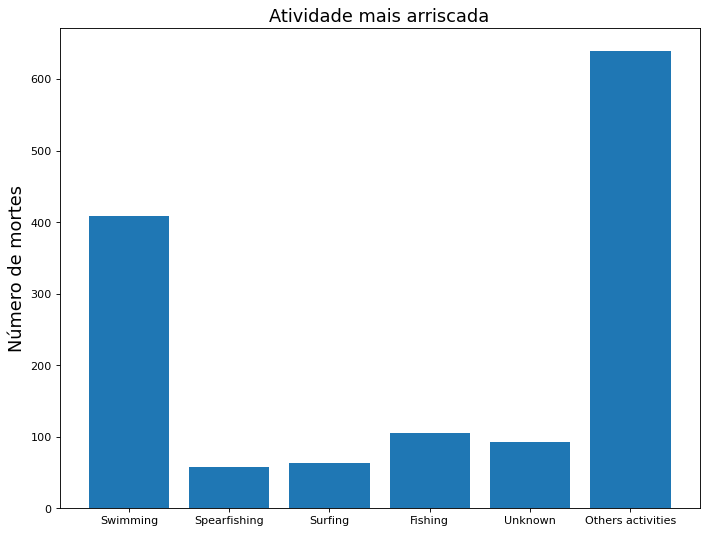

In [381]:
from matplotlib.pyplot import figure
fig = figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])
Activities = ['Swimming', 'Spearfishing', 'Surfing', 'Fishing', 'Unknown', 'Others activities'] 
Deaths = [len(mortes_nado),len(mortes_caça),len(mortes_surfing),len(mortes_pesca), len(mortes_unk), len(mortes_outras)] 
ax.bar(Activities,Deaths)
plt.title('Atividade mais arriscada', size = 16)
plt.ylabel('Número de mortes', size = 16)

plt.show()